In [30]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scprep
import pickle

In [31]:
import torch
from scipy.stats import gaussian_kde
import numpy as np

def kde(data, points_to_evaluate=None, bandwidth=None):
    """
    Perform kernel density estimation on n-dimensional data.
    
    Args:
        data (np.ndarray or torch.Tensor): Input data of shape (n_samples, n_dimensions)
        points_to_evaluate (np.ndarray or torch.Tensor, optional): Points at which to evaluate the KDE. 
            If None, the original data points are used.
        bandwidth (float, optional): Bandwidth for KDE. If None, Scott's rule is used.
    
    Returns:
        np.ndarray or torch.Tensor: Estimated density at each point in points_to_evaluate
    """
    is_torch = isinstance(data, torch.Tensor)
    
    if is_torch:
        original_dtype = data.dtype
        original_device = data.device
        data_np = data.cpu().numpy()
    else:
        data_np = data
    
    kde = gaussian_kde(data_np.T, bw_method=bandwidth)
    
    if points_to_evaluate is None:
        points_to_evaluate = data_np
    elif is_torch and isinstance(points_to_evaluate, torch.Tensor):
        points_to_evaluate = points_to_evaluate.cpu().numpy()
    
    result = kde(points_to_evaluate.T)
    
    if is_torch:
        result = torch.tensor(result, dtype=original_dtype, device=original_device)
    
    return result


In [32]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
res_dir = '../results_Mar4/'

In [33]:
traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
traj_T = np.load('../results_final_Dec22/trajectories_T_extreme.npy')
with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_phate = scaler.transform(adata.obsm['X_phate'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
traj_T_not_extreme = np.load('../results_final_Dec22/trajectories_T.npy')

In [35]:
start_pts = traj_T[0, :]
start_pts_not_extreme = traj_T_not_extreme[0, :]

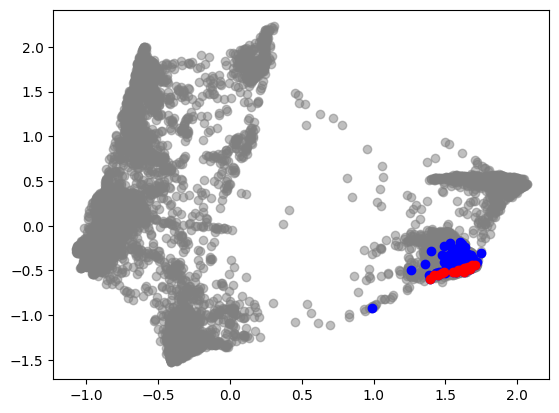

In [36]:
plt.scatter(X_phate[:, 0], X_phate[:, 1], color='gray', alpha=0.5)
plt.scatter(start_pts_not_extreme[:, 0], start_pts_not_extreme[:, 1], color='blue')
plt.scatter(start_pts[:, 0], start_pts[:, 1], color='red')


In [37]:
X_phate_t0 = scaler.transform(adata[adata.obs['day'] == 0].obsm['X_phate'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


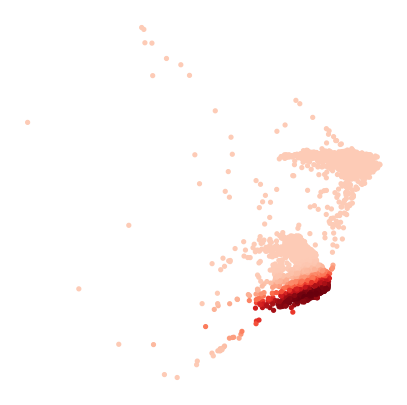

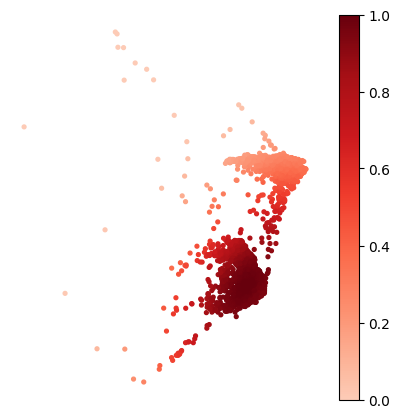

In [38]:
density_start_pts = kde(start_pts, X_phate_t0, bandwidth=5)
density_start_pts = (density_start_pts - density_start_pts.min()) / (density_start_pts.max() - density_start_pts.min())
density_start_pts_not_extreme = kde(start_pts_not_extreme, X_phate_t0, bandwidth=5)
density_start_pts_not_extreme = (density_start_pts_not_extreme - density_start_pts_not_extreme.min()) / (density_start_pts_not_extreme.max() - density_start_pts_not_extreme.min())

from matplotlib import colormaps
from matplotlib.colors import ListedColormap

cmap = colormaps['Reds']
cmap = ListedColormap(cmap(range(256)[50:]))

plt.figure(figsize=(5, 5))
scatter = plt.scatter(X_phate_t0[:, 0], X_phate_t0[:, 1], c=density_start_pts, cmap=cmap, s=7.5, label='Extreme')
# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f'{res_dir}/start_pts_kde.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()
plt.figure(figsize=(5, 5))
scatter = plt.scatter(X_phate_t0[:, 0], X_phate_t0[:, 1], c=density_start_pts_not_extreme, cmap=cmap, s=7.5, label='Not Extreme')
plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f'{res_dir}/start_pts_kde_not_extreme.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()



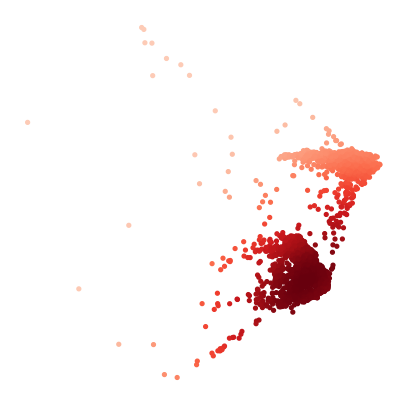

In [39]:
plt.figure(figsize=(5, 5))
scatter = plt.scatter(X_phate_t0[:, 0], X_phate_t0[:, 1], c=density_start_pts_not_extreme, cmap=cmap, s=7.5, label='Not Extreme')
# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f'{res_dir}/start_pts_kde_not_extreme_no_legend.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()



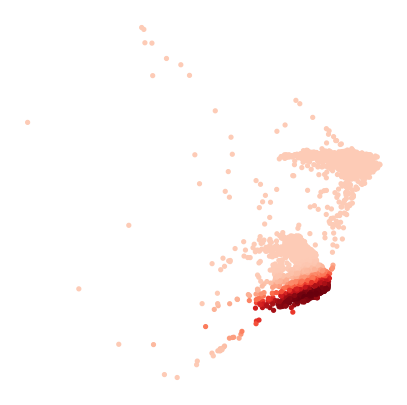

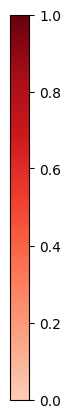

In [40]:
plt.figure(figsize=(5, 5))
scatter = plt.scatter(X_phate_t0[:, 0], X_phate_t0[:, 1], c=density_start_pts, cmap=cmap, s=7.5, label='Extreme')
# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f'{res_dir}/start_pts_kde.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

# Create a figure just for the colorbar/legend
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
# Create a dummy scatter plot with a single point to avoid size mismatch
# Use the first value from density_start_pts for the color
scatter = ax.scatter([0], [0], c=[density_start_pts[0]], cmap=cmap, s=7.5, label='Extreme')
# Only show the colorbar
cbar = plt.colorbar(scatter)
# Set the colorbar limits to match the full range of density_start_pts
cbar.mappable.set_clim(np.min(density_start_pts), np.max(density_start_pts))
# Hide the axes and the scatter point
ax.set_visible(False)
plt.savefig(f'{res_dir}/start_pts_kde_legend.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()


In [41]:
filtered_barcodes = np.load('../results_Mar4/day0_filtered_barcodes.npy', allow_pickle=True)
adata_t0 = adata[adata.obs['day'] == 0]
adata_t0.obs['kde'] = density_start_pts
adata_t0_filtered = adata_t0[filtered_barcodes]

/tmp/ipykernel_393747/3005423.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_t0.obs['kde'] = density_start_pts


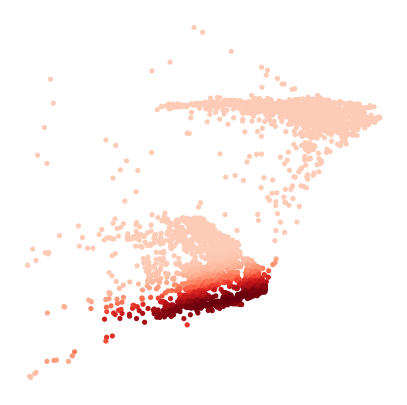

In [42]:

plt.figure(figsize=(5, 5))
scatter = plt.scatter(adata_t0_filtered.obsm['X_phate'][:, 0], adata_t0_filtered.obsm['X_phate'][:, 1], c=adata_t0_filtered.obs['kde'], cmap=cmap, s=7.5, label='Extreme')
# plt.colorbar(scatter)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f'{res_dir}/start_pts_kde_drop_outliers.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()